# Pandas - Introduction

This notebook is the first part of a series devoted to the[`pandas` library.
It presents the basic objects of this library and how it plays with `numpy`.

In [1]:
# Start using pandas (default import convention)
import pandas as pd
import numpy as np

In [2]:
# Let pandas speak for themselves
print(pd.__doc__)


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Visit the official website for a nicely written documentation: https://pandas.pydata.org

In [3]:
# Current version (should be 0.24 in 2019)
print(pd.__version__)

1.2.0


## Basic objects 

The **pandas** library has a vast API with many useful functions. However, most of this revolves
around two important classes:

* Series
* DataFrame

In this introduction, we will focus on them - what each of them does and how they relate to each other
and numpy objects.

### Series

Series is a one-dimensional data structure, central to pandas. 

For a complete API, visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [4]:
# My first series
series = pd.Series([1, 2, 3])
series

0    1
1    2
2    3
dtype: int64

This looks a bit like a Numpy array, does it not?

Actually, in most cases the Series wraps a Numpy array...

In [5]:
series.values  # The result is a Numpy array

array([1, 2, 3])

...and if we construct the series from a numpy array, it wraps it directly.

In [6]:
zeros_array = np.zeros(10)

# We check object identity
pd.Series(zeros_array).values is zeros_array

True

But there is something more. Alongside the values, we see that each item (or "row") has a certain label. The collection of labels is called **index**.

In [7]:
series.index

RangeIndex(start=0, stop=3, step=1)

This index (see below) can be used, as its name suggests, to index items of the series.

In [8]:
# Return an element from the series
series.loc[1]

2

In [9]:
# Construction from a dictionary
series_ab = pd.Series({"a": 2, "b": 4})
series_ab

a    2
b    4
dtype: int64

**Exercise**: Create a series with 5 elements.

In [10]:
result = ...

### DataFrame

A **DataFrame** is pandas' answer to Excel sheets - it is a collection of named columns (or, in our case, a collection of **Series**).
Quite often, we directly read data frames from an external source, but it is possible to create them from:
* a dict of Series, numpy arrays or other array-like objects
* from an iterable of rows (where rows are Series, lists, dictionaries, ...)

In [14]:
# List of lists (no column names)
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(table)
table_df

,0,1
0,a,1
1,b,3
2,c,5


In [15]:
# Dict of Series (with column names)
df = pd.DataFrame({
    'number': pd.Series([1, 2, 3, 4], dtype=np.int8),
    'letter': pd.Series(['a', 'b', 'c', 'd'])
})
df

,number,letter
0,1,a
1,2,b
2,3,c
3,4,d


In [16]:
# Numpy array (10x2), specify column names
data = np.random.normal(0, 1, (10, 2))

df = pd.DataFrame(data, columns=['a', 'b'])
df

,a,b
0,0.549428,-0.085922
1,-0.459107,0.591276
2,-0.844495,2.008266
3,1.906335,-0.462032
4,-0.889533,0.483394
5,0.497882,0.138273
6,0.336032,0.944945
7,-0.170603,0.429885
8,-0.311580,0.543498
9,-1.558922,-0.814398


In [20]:
# A DataFrame also has an index.
df.index

RangeIndex(start=0, stop=10, step=1)

In [19]:
# The columns also form an index.
df.columns

Index(['a', 'b'], dtype='object')

In [18]:
# ...that is shared by all columns
df.index is df["a"].index

True

## D(ata) types

Pandas builds upon the numpy data types (mentioned earlier) and adds a couple of more.

In [26]:
typed_df = pd.DataFrame({
  "bool": np.arange(5) % 2 == 0,
  "int": range(5),
  "int[nan]": pd.Series([np.nan, 0, 1, 2, 3], dtype="Int64"),
  "float": np.arange(5) * 3.14,
  "object": [None, 1, "2", [3, 4], 5 + 6j],
  "string?": ["a", "b", "c", "d", "e"],
  "string!": pd.Series(["a", "b", "c", "d", "e"], dtype="string"),
  "datetime": pd.date_range('2018-01-01', periods=5, freq='3M'),
  "timedelta": pd.timedelta_range(0, freq="1s", periods=5),
  "category": pd.Series(["animal", "plant", "animal", "animal", "plant"], dtype="category")
})
typed_df

,bool,int,int[nan],float,object,string?,string!,datetime,timedelta,category
0,True,0,<NA>,0.00,None,a,a,2018-01-31,0 days 00:00:00,animal
1,False,1,0,3.14,1,b,b,2018-04-30,0 days 00:00:01,plant
2,True,2,1,6.28,2,c,c,2018-07-31,0 days 00:00:02,animal
3,False,3,2,9.42,"[3, 4]",d,d,2018-10-31,0 days 00:00:03,animal
4,True,4,3,12.56,(5+6j),e,e,2019-01-31,0 days 00:00:04,plant


In [27]:
typed_df.dtypes

bool                    bool
int                    int64
int[nan]               Int64
float                float64
object                object
string?               object
string!               string
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
dtype: object

We will see some of the types practically used in further analysis.

## Indices & indexing



In [28]:
abc_series = pd.Series(range(3), index=["a", "b", "c"])
abc_series

a    0
b    1
c    2
dtype: int64

In [29]:
abc_series.index

Index(['a', 'b', 'c'], dtype='object')

In [30]:
abc_series.index = ["c", "d", "e"]  # Changes the labels in-place!
abc_series.index.name = "letter"
abc_series

letter
c    0
d    1
e    2
dtype: int64

In [31]:
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(
    table,
    index=["first", "second", "third"],
    columns=["alpha", "beta"]
)
table_df

,alpha,beta
first,a,1
second,b,3
third,c,5


In [32]:
alpha = table_df["alpha"]  # Simple [] indexing in DataFrame returns Series
alpha

first     a
second    b
third     c
Name: alpha, dtype: object

In [33]:
alpha["second"]             # Simple [] indexing in Series returns scalar values.

'b'

In [34]:
alpha.second   # This also works

'b'

but careful!

In [35]:
alpha.first

<bound method NDFrame.first of first     a
second    b
third     c
Name: alpha, dtype: object>

A slice with a `["list", "of", "columns"]` yields a `DataFrame` with those columns. 

For example:

In [36]:
table_df[["beta", "alpha"]]

,beta,alpha
first,1,a
second,3,b
third,5,c


`[["column_name"]]` returs a `DataFrame` as well, not `Series`:

In [37]:
table_df[["alpha"]]

,alpha
first,a
second,b
third,c


There are two ways how to properly index rows & cells in the DataFrame:

- `loc` for label-based indexing
- `iloc` for order-based indexing (it does not use the **index** at all)

Note the square brackets. The mentioned attributes actually are not methods
but special "indexer" objects. They accept one or two arguments specifying
the position along one or both axes.

**Exercise:** Create `DataFrame` whose `x`-column is $0, \frac{1}{4}\pi, \frac{1}{2}\pi, .. 2\pi $, `y` column is `cos(x)` and index are `fractions` `0, 1/4, 1/2 ... 2`

In [38]:
import fractions

index = [fractions.Fraction(n, ___) for n in range(___)]
x = np.___([___ for ___ in ___])
y = ___

df = pd.DataFrame(___, index = ___)

# display
df

TypeError: 'method' object cannot be interpreted as an integer

#### loc


In [ ]:
first = table_df.loc["first"]
first

In [ ]:
table_df.loc["first", "beta"]            

In [ ]:
table_df.loc["first":"second", "beta"]   # Use ranges (inclusive)

#### iloc

In [ ]:
table_df.iloc[1]

In [ ]:
table_df.iloc[0:4:2]   # Select every second row

In [ ]:
table_df.at["first", "beta"]

In [ ]:
type(table_df.at)

## Modifying DataFrames

Adding a new column is like assigning to adding a key/value pair to a dict.
Note that the operation, unlike most others, does modify the DataFrame.

In [ ]:
from datetime import datetime
table_df["now"] = datetime.now()
table_df

Non-destructive version that returns a new DataFrame, uses the `assign` method:

In [ ]:
table_df.assign(delta = [True, False, True])

In [ ]:
# However, the original DataFrame is not changed
table_df

Deleting a column is very easy too.

In [ ]:
del table_df["now"]
table_df

The **drop** method works with both rows and columns (creating a new data frame).

In [ ]:
table_df.drop("beta", axis=1)

In [ ]:
table_df.drop("second", axis=0)

**Exercise:** Use a combination of `reset_index`, `drop` and `set_index` to transform `table_df` into `pd.DataFrame({'index': table_df.index}, index=table_df["alpha"])`

In [39]:
results = table_df.___.___.___

# display
result

AttributeError: 'DataFrame' object has no attribute '___'

---
**Let's get some data!**

# Pandas - Reading data

This notebook is the second part of the series devoted to the pandas library.

It explores the ways how data can be imported into DataFrames. 

More details can be found in the official documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Most of the functions for reading data are named `pandas.read_XXX`, where XXX is the format used. We will go through several commonly used ones.

### This tutorial data sets origins

* IMDB: https://datasets.imdbws.com/
* Box office (Kaggle / TMDB): https://www.kaggle.com/c/tmdb-box-office-prediction/data
* Awards: https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films
* Rotten Tomatoes: https://data.world/prasert/rotten-tomatoes-top-movies-by-genre
* Guardian: https://www.theguardian.com/news/datablog/2010/oct/16/greatest-films-of-all-time
* Wikipedia movies: https://github.com/prust/wikipedia-movie-data


In [13]:
# List functions for input in pandas.

print("\n".join(method for method in dir(pd) if method.startswith("read_")))

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table


## Read CSV

Nowadays, a lot of data comes in the textual Comma-separated values format (CSV).
Although not properly standardized, it is the de-facto standard for files that are not
huge and are meant to be read by human eyes too.

Let's read the population of U.S. states (and several other territories that we will need later):

In [14]:
territories = pd.read_csv("data/us_state_population.csv")
territories.head(9)

,Territory,Population
0,California,39368078
1,Texas,29360759
2,Florida,21733312
3,New York,19336776
4,Pennsylvania,12783254
5,Illinois,12587530
6,Ohio,11693217
7,Georgia,10710017
8,North Carolina,10600823


The automatic data type parsing automatically converts columns to appropriate types:

In [16]:
territories.dtypes

Territory     object
Population     int64
dtype: object

Sometimes the CSV input does not work out of the box. Although pandas automatically understands and reads zipped files,
it usually does not automatically infer the file format - for details, see the `read_csv` documentation here: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
pd.read_csv('../data/title.basics.tsv.gz')

...in this case, the CSV file does not use commas to separate values. Therefore, we need to specify a few more arguments:

In [ ]:
imdb_titles = pd.read_csv('../data/title.basics.tsv.gz', sep='\t')
imdb_titles.head()

Noticed the `\N` endYear values?

**Exercise:** Use `na_values` argument to mark `\N` as a null (missing) value. 

In [ ]:
%exercise

imdb_titles = pd.read_csv('../data/title.basics.tsv.gz', sep='\t', na_values=...)

In [ ]:
%validate

assert pd.isna(imdb_titles.loc[0, 'endYear'])

See the difference?

In [ ]:
imdb_titles.head()

## Read Excel

Let's read the list of laser accidents involving 

In [ ]:
pd.read_excel("../data/guardian-greatest_films_of_all_time.xlsx")

Hmmmmph... Pandas parsed just the first spreadsheet. Let's see what are the options. If in doubt, look in the documentation:
https://pandas.pydata.org/pandas-docs/stable/reference/io.html#excel

In [ ]:
xlsx = pd.io.excel.ExcelFile("../data/guardian-greatest_films_of_all_time.xlsx")
xlsx

In [ ]:
xlsx.sheet_names

In [ ]:
xlsx.parse("HORROR")

In [ ]:
%exercise

crimes =...                    # Find the table of crime movies
tenth_best = crimes.loc[...]   # Find the 10-th best crime movie
movie_name = ...               # Get the name of the movie

# display
movie_name

In [ ]:
%validate

assert movie_name[7:9] == "la"

## Read HTML (Optional)

Pandas is able to scrape data from tables embedded in web pages using the `read_html` function.
This might or might not bring you good results and probably you will have to tweak your
data frame manually. But it is a good starting point - much better than being forced to parse
the HTML ourselves!

Let's download a list of highest-grossing films from wikipedia!

In [ ]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")
type(tables), len(tables)

Does the page really contain 95 tables? The number is quite high and we must check which of the tables
are meaningful and which are not. We are mostly interested in the first displayed one.

**Exercise:** Find **i** to obtain the right table:

In [ ]:
%exercise

i = ...

table = tables[i]
table.head(10)

## Write CSV

Pandas is able to write to many various formats but the usage is similar. 

In [ ]:
award_table.to_csv("awards.csv", index=False)

In [ ]:
%head awards.csv 10

Note: When done with this notebook, we suggest that you shutdown the kernel to free the memory.

# Pandas - Data manipulations

This notebook is the third part of the collection devoted to the pandas library.

In [8]:
# Necesssary import evil

import pandas as pd
import numpy as np
# ? from IPython.display import display, HTML, IFrame

np.random.seed(42)

In the previous notebook, we imported data from several data formats.
Let's start from there and see what basic manipulations we can do
with the DataFrames.

In [28]:
laser_incidents = pd.read_excel("https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2019_final.xlsx", usecols="A:J")
laser_incidents

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
0,2019-01-01,35,N3EG,C421,2500,SAT,Green,No,San Antonio,Texas
1,2019-01-01,43,RPA3469,E75S,4000,IAH,Green,No,Houston,Texas
2,2019-01-01,44,UAL1607,A319,4000,IAH,Green,No,Houston,Texas
3,2019-01-01,110,N205TM,BE20,2500,HDC,Green,No,Hammond,Louisiana
4,2019-01-01,115,JIA5233,CRJ9,2000,JAX,Green,No,Jacksonville,Florida
...,...,...,...,...,...,...,...,...,...,...
6131,2019-12-31,845,ASH5861,CRJ9,3000,JAN,Green,No,Jackson,Mississippi
6132,2019-12-31,929,N22P,CRUZ,2500,HNL,Green,No,Honolulu,Hawaii
6133,2019-12-31,2310,GTH530,GLF4,500,SJU,White,No,Carolina,Puerto Rico
6134,2019-12-31,2312,AMF6916,SW4,600,SJU,Green,No,Carolina,Puerto Rico


## First look at the data

Let's see what we have in the datasets...

In [10]:
laser_incidents.head()

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2019-01-01,35,N3EG,C421,2500,SAT,Green,No,San Antonio,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,43,RPA3469,E75S,4000,IAH,Green,No,Houston,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,44,UAL1607,A319,4000,IAH,Green,No,Houston,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,110,N205TM,BE20,2500,HDC,Green,No,Hammond,Louisiana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,115,JIA5233,CRJ9,2000,JAX,Green,No,Jacksonville,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
laser_incidents.tail()

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6131,2019-12-31,845,ASH5861,CRJ9,3000,JAN,Green,No,Jackson,Mississippi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6132,2019-12-31,929,N22P,CRUZ,2500,HNL,Green,No,Honolulu,Hawaii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6133,2019-12-31,2310,GTH530,GLF4,500,SJU,White,No,Carolina,Puerto Rico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6134,2019-12-31,2312,AMF6916,SW4,600,SJU,Green,No,Carolina,Puerto Rico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6135,2019-12-31,2327,N715TH,C172,3000,CHO,Green,No,Charlottesville,Virginia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For an unknown, potentially unevenly distributed dataset, looking at the beginning / end is typically not the best idea. We'd rather sample randomly:

In [29]:
# Show a few examples
laser_incidents.sample(10)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
3073,2019-07-13,250,N714ER,C150,3500,CAK,Green,No,Akron,Ohio
724,2019-02-14,555,FDX1287,B757,29000,LIT,Green,No,Little Rock,Arkansas
1829,2019-04-03,525,UAL1075,B737,1700,SNA,Green,No,Santa Ana,California
5056,2019-11-06,2355,EIWFI,CL60,2000,MIA,Green,No,Miami,Florida
3313,2019-08-13,530,AAL1270,B738,24000,SAF,Green,No,Santa Fe,New Mexico
5270,2019-11-17,135,N546CW,P28A,7500,PDT,Green,No,Pendleton,Oregon
2936,2019-07-25,1050,FDX1869,B767,4000,EMT,Green,No,El Monte,California
3796,2019-08-02,515,SWA368,B737/L,14000,SJC,Green,No,San Jose,California
3388,2019-08-31,340,CPZ5846,E75S,14000,PVU,Green,No,Provo,Utah
4122,2019-09-16,235,UCA4985,E45X,11000,GON,Green,No,Groton,Connecticut


`describe` is often useful to get the basics statistics.

In [30]:
laser_incidents.describe(include="all")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
count,6136,6136.000000,6135,6134,6136.0,6136,6136,6136,6136,6136
unique,365,NaN,5296,495,188.0,672,28,3,769,58
top,2019-01-05 00:00:00,NaN,N473CA,B737,4000.0,PHX,Green,No,Phoenix,California
freq,37,NaN,8,662,413.0,163,5350,6092,185,1167
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,472.174707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,501.280550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,212.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that only some columns, to be procise columns with properly recognized numeric type, are reported.

### Column data types

In [31]:
laser_incidents.dtypes

Incident Date    datetime64[ns]
Incident Time             int64
Flight ID                object
Aircraft                 object
Altitude                 object
Airport                  object
Laser Color              object
Injury                   object
City                     object
State                    object
dtype: object

Let's investigate some of the columns...

To analyze **Laser Color**, we can look at its typical values.

In [14]:
laser_incidents["Laser Color"].describe()

count      6136
unique       28
top       Green
freq       5350
Name: Laser Color, dtype: object

Not too many different values.

In [15]:
laser_incidents["Laser Color"].unique()

array(['Green', 'Blue and Purple', 'Red', 'Blue', 'Green and Red',
       'White', 'Blue and Green', 'Multi', 'Purple', 'Green and White',
       'Yellow and White', 'Blue and White', 'White or Amber', 'Unknown',
       'Red and White', 'Yellow', 'Orange', 'Green and yellow',
       'Red and Green', 'Amber', 'yellow', 'purple', 'white',
       'Yellow and Green', 'Green  ', 'green', 'White and Blue',
       'Red, Blue, and Green'], dtype=object)

In [16]:
laser_incidents["Laser Color"].value_counts(normalize=True)

Green                   0.871904
Blue                    0.081486
White                   0.013364
Red                     0.011571
Unknown                 0.006682
Purple                  0.005215
Green and Red           0.002119
Multi                   0.001304
Blue and Purple         0.000978
Yellow                  0.000815
Red and Green           0.000652
Orange                  0.000652
Blue and Green          0.000489
Blue and White          0.000489
Red and White           0.000163
green                   0.000163
White and Blue          0.000163
yellow                  0.000163
Yellow and White        0.000163
purple                  0.000163
Green and yellow        0.000163
Green                   0.000163
Yellow and Green        0.000163
Red, Blue, and Green    0.000163
Green and White         0.000163
Amber                   0.000163
white                   0.000163
White or Amber          0.000163
Name: Laser Color, dtype: float64

This column is a very good candidate to turn into a pandas-special, **Categorical** data type. (See https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [20]:
laser_incidents["Laser Color"].memory_usage(deep=True)   # ~60 bytes per item

380379

In [18]:
color_category = laser_incidents["Laser Color"].astype("category")
color_category.sample(10)

4290      Green
3206       Blue
5767    Unknown
5097      Green
2684      Green
3256      Green
4851      Green
1032      Green
3830      Green
4471       Blue
Name: Laser Color, dtype: category
Categories (28, object): ['Amber', 'Blue', 'Blue and Green', 'Blue and Purple', ..., 'green', 'purple', 'white', 'yellow']

In [23]:
color_category.memory_usage(deep=True)              # ~1-2 bytes per item

9206

**Exercise:** Remember that assigning or replacing a column inside a dataframe works the same way as setting a value inside a dict.
Please, replace the original "Laser Color" column with the new Categorical series:

Pandas is generally quite good at guessing (inferring) number types. 
You may wonder why `startYear` is float and not int though. 
This is a consequence of not having an integer nan in numpy. There's been many discussions about this.

In [26]:
laser_incidents["Altitude"]

0       2500
1       4000
2       4000
3       2500
4       2000
        ... 
6131    3000
6132    2500
6133     500
6134     600
6135    3000
Name: Altitude, Length: 6136, dtype: object

In [ ]:
imdb_titles.startYear.astype(int)

In [ ]:
# To address that, pandas 0.24 Introduced nullable integers
imdb_titles.startYear.astype("Int64").tail(20)

### Filtering

Indexing in pandas Series / DataFrames (`[]`) support also boolean (masked) arrays. These arrays can be obtained by applying boolean operations on them.

You can also use standard **comparison operators** like `<`, `<=`, `==`, `>=`, `>`, `!=`. 

It is possible to perform **logical operators** with boolean series too. But note that `and`, `or`, `not` are keywords. You 

As an example, find all movies!

In [ ]:
is_movie = (imdb_titles.titleType == "movie")
is_movie.sample(10)

Now we can directly apply the boolean mask. (Note: This is no magic. You can construct the mask yourself)

In [ ]:
imdb_titles[is_movie].sample(10)

Or maybe we should include TV movies as well?

In [ ]:
# isin takes an array of possible values
movie_titles = imdb_titles[imdb_titles.titleType.isin(["movie", "tvMovie"])]
movie_titles.sample(10)

We may wonder why we have two title-ish columns: originalTitle and primaryTitle.

In [ ]:
different_title = (movie_titles.originalTitle != movie_titles.primaryTitle)
different_title.name = "Different title"   # Series can have names (Note: DataFrames can't)
different_title.value_counts()

### Visualization intermezzo

Without much further ado, let's create our first plot.

In [ ]:
different_title.value_counts().plot(kind="bar")

We may also want to get rid of wrong / incomplete data.

In [ ]:
# Movies from the future?
imdb_titles[imdb_titles.startYear > 2019].startYear.value_counts()

In [ ]:
# Movies with startYear undefined
imdb_titles[imdb_titles.startYear.isna()].head()

**Exercise:** Use the `imdb_titles.startYear > 2019` filter and `dropna` method to get rid of rows with wrong / undefined years.

In [ ]:
%exercise

imdb_correct_titles = imdb_titles[___].dropna(subset=___)

In [ ]:
%validate

assert not (imdb_correct_titles.startYear > 2019).any()
assert not imdb_correct_titles.startYear.isna().any()
assert imdb_correct_titles.shape == (1694587, 9)

**Exercise:** Drop `titleType` and `endYear` columns and rows with `NaN` values (use `dropna`).

In [ ]:
%exercise

movie_titles = (movie_titles
                .drop(columns=___)
                .___
                )

In [ ]:
%validate

assert not any(result.isna().any())
assert sorted(result.columns) == ['genres', 'isAdult', 'originalTitle',  'primaryTitle', 
                                        'runtimeMinutes', 'startYear', 'tconst']

## Sorting

In [ ]:
# Display 5 longest movies 
movie_titles.sort_values("runtimeMinutes", ascending=False).head()

Hmm, let's look at *Modern Times Forever* - an apt title :)

In [ ]:
IFrame(
    src="https://en.wikipedia.org/wiki/Modern_Times_Forever_(Stora_Enso_Building,_Helsinki)",
    width=900,
    height=400,
)

In [ ]:
# Alternative
movie_titles.nlargest(5, "runtimeMinutes")

**Exercise:** Find the 10 oldest movies that are longer than 2 hours

In [ ]:
%exercise

result = movie_titles[___].___(___, ___)
result

In [ ]:
%validate

assert result.iloc[9]["startYear"] == 1914

In [ ]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Indiana Jones")) & (movie_titles["titleType"] == "movie")]

## Arithmetics and string manipulation

Standard **arithmetic operators** work on numerical columms too. And so do mathematical functions. Note all such operations are performed in a vector-like fashion.

In [ ]:
movie_titles[["originalTitle", "startYear"]].assign(age = 2019 - movie_titles["startYear"]).sample(20)

**Exercise:** Calculate the length of movies in hours.

In [ ]:
%exercise

result = movie_titles[["originalTitle", "runtimeMinutes"]].assign(... = ...)
result.sample(10)

In [ ]:
%validate

assert result.iloc[0]["hours"] == 0.75

In [ ]:
# If only the following had any sense!
np.sin(movie_titles["runtimeMinutes"]).sample(10)

### Summary statistics

Note that the following methods return scalars

In [ ]:
# Average length of the movies
movie_titles["runtimeMinutes"].mean()

In [ ]:
# Standard deviation
movie_titles["runtimeMinutes"].std()

In [ ]:
movie_titles["startYear"].max()

**Exercise:** How many years would it take to watch all movies in the catalogue?

In [ ]:
%exercise
result = movie_titles["runtimeMinutes"] ...
result

In [ ]:
%validate

assert np.round(result, 3) == 65.154

### Basic string operations

These are typically accessed using the `.str` "accessor" of the Series like this:
    
- series.str.lower
- series.str.split
- series.str.startswith
- series.str.contains
- ...

In [ ]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Star Wars: Episode")) & (movie_titles["titleType"] == "movie")]

**Exercise:** Find all Pink Panther movies. Note that their title does not necessarily start with "Pink"

In [ ]:
%exercise

is_pink = ...
pink = movie_titles[is_pink]
pink

In [ ]:
%validate

assert pink.shape[0] == 14

In [ ]:
# String arithmetics work too!
url = "https://www.imdb.com/title/" + movie_titles["tconst"]
movie_titles[["primaryTitle"]].assign(url=url).sample(10)

Let's investigate the genres a bit:

In [ ]:
split_genres = movie_titles.genres.str.split(",").dropna()
split_genres.sample(10)

In [ ]:
genres = {genre for row in split_genres.iteritems() for genre in row[1]}

In [ ]:
genres

In [ ]:
# "One-hot" encoding of genres
movie_with_genres = movie_titles[['primaryTitle']].assign(
    **{genre : movie_titles.genres.str.contains(genre) * 1 for genre in genres}
)
movie_with_genres.sample(10)

In [ ]:
genre_counts = movie_with_genres[movie_with_genres == 1].iloc[:,1:].count()
genre_counts

In [ ]:
genre_counts.plot(kind="bar")

In [ ]:
movie_titles["startYear"].plot(kind="hist")

We see the one outlier and in general, the plots are not so nice. Being explicit sometimes helps.

In [ ]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))

No movies before 1900 / 1910? Really? Let's check:

In [ ]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))
ax.set_yscale("log")

**Exercise:** Plot a histogram of runtime minutes (limiting to a reasonable range).

In [ ]:
%exercise

movie_titles[___].plot(___)

In [ ]:
# Note: this is something that could be mor easily done with .groupby operation
average_genre_length = (movie_with_genres.iloc[:,1:].apply(lambda s: s * movie_titles["runtimeMinutes"])).sum() / genre_counts

In [ ]:
average_genre_length

**Exercise:** Sort the genres from the longest to shortest and visualize them using a bar plot.

In [ ]:
%exercise

___.___.plot(___)

**Exercise**: Find proper filters for the Lord of the Rings trilogy. Note that you will probably need to combine more conditions (multiple solutions possible).

In [ ]:
%exercise

is_lotr = ...
is_real_lotr = is_lotr & 

movie_titles[is_real_lotr]

**Exercise**: What is longer? The Lord of the Rings trilogy or The Hobbit "trilogy"?

Use the previous as a base to find the Hobbit movies. Then calculate the total length of each trio.

In [ ]:
%exercise

is_hobbit = ...
is_real_hobbit = ...

hobbit_length = ...
lotr_length = ...

print(f"The Hobbit length: {hobbit_length}, The Lord of the Rings length: {lotr_length}")

pd.concat([movie_titles[is_real_lotr], movie_titles[is_real_hobbit]]).sort_values("startYear")

In [ ]:
%validate

assert hobbit_length % 100 == 74
assert lotr_length // 100 == 5

**Exercise:** Find the movie with the (primary) longest title.

Hint: `idxmax()` method on the Series returns the index of the item with the maximum value. You can't (at least should) not use the maximum value itself.

In [ ]:
%exercise

longest_title_movie = ...

print(longest_title_movie["primaryTitle"])

longest_title_movie

In [ ]:
%validate

assert longest_title_movie["primaryTitle"][2] == "s"

# Pandas - Merging, grouping, aggregation and time series

In [1]:
# Necesssary import evil

import pandas as pd
import numpy as np
from IPython.display import display, HTML, IFrame

np.random.seed(42)

In [ ]:
# make the cells wide
display(HTML("<style>.container { width:95% !important; }</style>"))

In [45]:
available_reports = (
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2020.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2019_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2018_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2017.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2016.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2015.xls",
    # the columns here are very different, skip it for this analysis
    # "https://www.faa.gov/about/initiatives/lasers/laws/media/laser_incidents_2010-2014.xls",
)

laser_incidents_raw = pd.concat((pd.read_excel(url) for url in available_reports), axis=0, ignore_index=True)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Aviation Altitude,State
0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,No,Santa Barbara,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,155,AMF1829,B190,40000,SSF,Green,No,San Antonio,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,214,NKS1881,A320,2500,TPA,Green,No,Tampa,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,217,FDX3873,B763,3000,DFW,Green,No,Fort Worth,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,218,SWA3635,B739,11000,MOD,Green,No,Modesto,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36458,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,No,Las Vegas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nevada
36459,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,No,Lincoln,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California
36460,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,No,Westhampton Beach,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York
36461,2015-12-31,1147,UAL197,B737,300,GUM,Green,No,Guam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guam


In [46]:
laser_incidents_raw.to_csv("data/laser_incidents_2015-2020_raw.csv")

In [ ]:
laser_incidents_raw = pd.read_csv("data/laser_incidents_2015-2020_raw.csv")

In [238]:
laser_incidents_raw

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Aviation Altitude,State
0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,No,Santa Barbara,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,155,AMF1829,B190,40000,SSF,Green,No,San Antonio,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,214,NKS1881,A320,2500,TPA,Green,No,Tampa,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,217,FDX3873,B763,3000,DFW,Green,No,Fort Worth,Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,218,SWA3635,B739,11000,MOD,Green,No,Modesto,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36458,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,No,Las Vegas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nevada
36459,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,No,Lincoln,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California
36460,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,No,Westhampton Beach,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York
36461,2015-12-31,1147,UAL197,B737,300,GUM,Green,No,Guam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guam


## Data cleaning

TODO move to IO

In [48]:
# use only meaningful columns, not Unnamed ...
laser_incidents = laser_incidents_raw[[column for column in laser_incidents.columns if "Unnamed" not in column]]
laser_incidents.columns

Index(['Incident Date', 'Incident Time', 'Flight ID', 'Aircraft', 'Altitude',
       'Airport', 'Laser Color', 'Injury', 'City', 'State',
       'Aviation Altitude', 'State '],
      dtype='object')

In [49]:
# there are "State" and "State " columns: merge them into a single one
laser_incidents = laser_incidents.assign(State=laser_incidents["State"].where(laser_incidents["State"].notna(), laser_incidents["State "]))

In [50]:
# strip white space from state names
laser_incidents = laser_incidents.assign(State=laser_incidents["State"].str.strip())

In [51]:
# drop columns we do not need any more ("Aviation Altitude" are all NA values)
laser_incidents = laser_incidents.drop(columns=["State ", "Aviation Altitude"])

In [123]:
import collections

# needed below for mapping string values to bool
# yes and no are defined, anything else becomes NA
value_to_bool = collections.defaultdict(lambda: pd.NA)
value_to_bool["yes"] = True
value_to_bool["no"] = False


# try to convert to better dtypes
laser_incidents = laser_incidents.convert_dtypes()
# convert some columns manually with some preprocessing
laser_incidents = laser_incidents.assign(
    **{
        "Incident Time": laser_incidents["Incident Time"].astype("string"),
        "Altitude": pd.to_numeric(laser_incidents["Altitude"], errors="coerce"),
        "Injury": laser_incidents["Injury"]
        .str.lower()
        .str.strip()
        .map(value_to_bool)
        .astype("boolean"),
    }
)
laser_incidents.dtypes


Incident Date    datetime64[ns]
Incident Time            string
Flight ID                object
Aircraft                 object
Altitude                  Int64
Airport                  string
Laser Color              string
Injury                  boolean
City                     string
State                    string
timestamp        datetime64[ns]
dtype: object

In [124]:
# there are suspicious times
laser_incidents.loc[laser_incidents["Incident Time"].astype("string").str.len() > 4]

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp


In [125]:
# make the suspicious times NA
laser_incidents.loc[laser_incidents["Incident Time"].astype("string").str.len() > 4, "Incident Time"] = pd.NA

In [126]:
# using string manipulation and time deltas to construct full time stamps (date + time)
laser_incidents = laser_incidents.assign(
    timestamp=laser_incidents["Incident Date"]
    + pd.to_timedelta(
        laser_incidents["Incident Time"].str[:-2]
        + "h"
        + laser_incidents["Incident Time"].str[-2:]
        + "min",
        errors="coerce",
    )
)

In [127]:
laser_incidents

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp
0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,False,Santa Barbara,California,2020-01-01 01:48:00
1,2020-01-01,155,AMF1829,B190,40000,SSF,Green,False,San Antonio,Texas,2020-01-01 01:55:00
2,2020-01-01,214,NKS1881,A320,2500,TPA,Green,False,Tampa,Florida,2020-01-01 02:14:00
3,2020-01-01,217,FDX3873,B763,3000,DFW,Green,False,Fort Worth,Texas,2020-01-01 02:17:00
4,2020-01-01,218,SWA3635,B739,11000,MOD,Green,False,Modesto,California,2020-01-01 02:18:00
...,...,...,...,...,...,...,...,...,...,...,...
36458,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,False,Las Vegas,Nevada,2015-12-31 05:25:00
36459,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,False,Lincoln,California,2015-12-31 06:23:00
36460,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,False,Westhampton Beach,New York,2015-12-31 11:11:00
36461,2015-12-31,1147,UAL197,B737,300,GUM,Green,False,Guam,Guam,2015-12-31 11:47:00


In [128]:
laser_incidents.dtypes

Incident Date    datetime64[ns]
Incident Time            string
Flight ID                object
Aircraft                 object
Altitude                  Int64
Airport                  string
Laser Color              string
Injury                  boolean
City                     string
State                    string
timestamp        datetime64[ns]
dtype: object

## Merging data

It is a common situation where we have two or more datasets with different columns that we need to bring together.
This operation is called *merging* and the Pandas apparatus is to a great detail described in [the documentation](https://pandas.pydata.org/docs/user_guide/merging.html).

In our case, we would like to attach the state populations to the dataset. 


In [239]:
population = pd.read_csv("data/us_state_population.csv")
population

,Territory,Population
0,California,39368078
1,Texas,29360759
2,Florida,21733312
3,New York,19336776
4,Pennsylvania,12783254
5,Illinois,12587530
6,Ohio,11693217
7,Georgia,10710017
8,North Carolina,10600823
9,Michigan,9966555


We will of course use the state name as the merge *key*. Before actually doing the merge, we can explore a bit whether all state names
from the laser incidents dataset are present in our population table.

In [248]:
unknown_states = laser_incidents.loc[~laser_incidents["State"].isin(population["Territory"]), "State"]
print(f"There are {unknown_states.count()} rows with unknown states.")
print(f"Unknown state values are: \n{list(unknown_states.unique())}.")

There are 1026 rows with unknown states.
Unknown state values are: 
['Puerto Rico', <NA>, 'Virgin Islands', 'Miami', 'Guam', 'North Hampshire', 'Marina Islands', 'Teas', 'Mexico', 'DC', 'VA', 'Northern Marina Islands', 'Mariana Islands', 'Oho', 'Northern Marianas Is', 'UNKN', 'U.S. Virgin Islands', 'Massachussets', 'FLorida', 'D.C.', 'MIchigan', 'Northern Mariana Is', 'Micronesia'].


We could certainly clean the data by correcting some of the typos. Since the number of the rows with unknown states is not large
(compared to the length of the whole dataset), we will deliberetly not fix the state names.
Instead, we will remove those rows from the merged dataset by using the *inner* type of merge.
All the merge types: *left*, *inner*, *outer* and *right* are well explained by the schema below.
![merge types](image-20210124-115636.png)

We can use the [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function to add the `"Population"` values.

In [249]:
laser_incidents_w_population = pd.merge(
    laser_incidents, population, left_on="State", right_on="Territory", how="inner"
)

In [250]:
laser_incidents_w_population

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp,Territory,Population
0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,False,Santa Barbara,California,2020-01-01 01:48:00,California,39368078
1,2020-01-01,218,SWA3635,B739,11000,MOD,Green,False,Modesto,California,2020-01-01 02:18:00,California,39368078
2,2020-01-01,310,SWA6092,B737,11000,SNS,Green,False,Salinas,California,2020-01-01 03:10:00,California,39368078
3,2020-01-01,325,DAL930,A319,5000,MYF,Green,False,San Diego,California,2020-01-01 03:25:00,California,39368078
4,2020-01-01,435,DAL1211,A320,7500,LAX,Green,False,Los Angeles,California,2020-01-01 04:35:00,California,39368078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35426,2016-11-30,2048,FRG89,E120,5000,BTV,Green,False,Burlington,Vermont,2016-11-30 20:48:00,Vermont,623347
35427,2015-05-16,213,N226CV,C560,9000,BTV,Green,False,Burlington,Vermont,2015-05-16 02:13:00,Vermont,623347
35428,2015-06-07,410,ASQ558T,E45/X,7000,BTV,Green,False,Burlington,Vermont,2015-06-07 04:10:00,Vermont,623347
35429,2015-08-17,106,GJS3621,CRJ7,5000,BTV,Green,False,Burlington,Vermont,2015-08-17 01:06:00,Vermont,623347


In [251]:
laser_incidents_w_population.describe(include="all", datetime_is_numeric=True)

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,timestamp,Territory,Population
count,35431,35430,35419,35379,35197.000000,35422,35430,35416,35430,35431,32617,35431,3.543100e+04
unique,NaN,1097,24316,1682,NaN,1994,106,2,2218,51,NaN,51,NaN
top,NaN,300,UNKN,B737,NaN,LAX,Green,False,Phoenix,California,NaN,California,NaN
freq,NaN,291,47,3750,NaN,988,31775,35237,1156,7268,NaN,7268,NaN
mean,2017-09-01 14:59:37.138663936,NaN,NaN,NaN,7463.649402,NaN,NaN,NaN,NaN,NaN,2017-09-03 00:07:18.454180096,NaN,1.706455e+07
min,2015-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00,NaN,5.823280e+05
25%,2016-03-23 00:00:00,NaN,NaN,NaN,2500.000000,NaN,NaN,NaN,NaN,NaN,2016-03-27 02:36:00,NaN,5.807719e+06
50%,2017-08-07 00:00:00,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,NaN,NaN,2017-08-05 02:01:00,NaN,1.071002e+07
75%,2019-01-14 00:00:00,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN,NaN,2019-01-21 04:38:00,NaN,2.936076e+07
max,2020-08-01 00:00:00,NaN,NaN,NaN,240000.000000,NaN,NaN,NaN,NaN,NaN,2020-08-01 10:49:00,NaN,3.936808e+07


## Grouping & aggregation

A common pattern in data analysis is grouping (or binning) data based on some property and getting some aggredate statistics.

*Example:* Group this workshop participants by nationality a get the cardinality (the size) of each group.

Possibly the simplest group and aggregation is the `value_counts` method, which groups by the respective column value
and yields the number (or normalized frequency) of each unique value in the data.

In [252]:
laser_incidents_w_population["State"].value_counts(normalize=False)

California              7268
Texas                   3620
Florida                 2702
Arizona                 1910
Colorado                 988
Washington               982
Kentucky                 952
Illinois                 946
New York                 921
Oregon                   895
Tennessee                888
Nevada                   837
Pennsylvania             826
Indiana                  812
Utah                     789
Ohio                     750
Georgia                  714
North Carolina           605
Missouri                 547
Minnesota                531
New Jersey               519
Michigan                 505
Hawaii                   500
Alabama                  473
Oklahoma                 412
Virginia                 412
New Mexico               401
Louisiana                351
Massachusetts            346
South Carolina           306
Maryland                 255
Arkansas                 237
Idaho                    237
Wisconsin                207
Iowa          

This is just a primitive grouping and aggregation operation, we will look into more advanced patterns. 
Let us say we would like to get some numbers (statistics) for individual states.
We can [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the dataset by the `"State"` column:

In [253]:
grouped_by_state = laser_incidents_w_population.groupby("State")

What did we get? 

In [254]:
grouped_by_state

What is this `DataFrameGroupBy` object? [Its use case is](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


Let's try a simple aggregate: the mean of altitude for each state:

In [255]:
grouped_by_state["Altitude"].mean().sort_values()

State
Hawaii                   4564.536585
Florida                  4970.406773
Alaska                   5209.848485
Wisconsin                5529.951220
New York                 5530.208743
Maryland                 6071.739130
District of Columbia     6087.144444
New Jersey               6204.306950
Illinois                 6306.310566
Massachusetts            6473.763848
Texas                    6487.493759
Delaware                 6602.380952
Arizona                  6678.333158
Nevada                   6730.037485
California               6919.705613
Washington               7110.687629
Louisiana                7276.276353
Nebraska                 7277.321429
Michigan                 7330.459082
Oregon                   7411.285231
South Dakota             7419.607843
North Dakota             7455.434783
Ohio                     7482.409880
Pennsylvania             7518.614724
Connecticut              7519.562842
Vermont                  7610.714286
Idaho                    7636.75

What if we were to group by year? We don't have a year column but we can just extract the year from the date and use it for `groupby`.

In [152]:
grouped_by_year = laser_incidents_w_population.groupby(laser_incidents_w_population["timestamp"].dt.year)

You may have noticed how we extracted the year using the [`.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors).
We will use `.dt` even more below.

Let's calculate the mean altitude of laser incidents per year. Are the lasers getting more powerful? 🤔

In [258]:
mean_altitude_per_year = grouped_by_year["Altitude"].mean().sort_index()
mean_altitude_per_year

timestamp
2015.0    6639.865011
2016.0    7169.452716
2017.0    7536.853347
2018.0    7674.939628
2019.0    8312.384213
2020.0    8684.153212
Name: Altitude, dtype: Float64

We can also quickly plot the results, more on plotting in the next lessons.

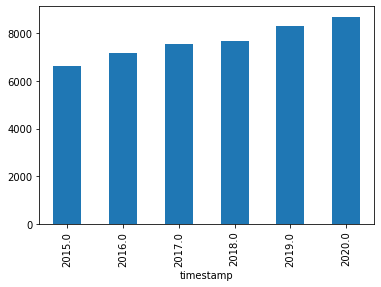

In [262]:
mean_altitude_per_year.plot(kind="bar");

**Exercise:** Calculate the `sum` of injuries per year. Use the fact that `True + True = 2` ;)

We can also create a new `Series` if the corresponding column does not exist in the dataframe and group it by another `Series`
(which in this case is a column from the dataframe). Important is that the grouped and the by series have the same index.

In [270]:
# how many incidents per million inhabitants are there for each state?
incidents_per_million = (1_000_000 / laser_incidents_w_population["Population"]).groupby(laser_incidents_w_population["State"]).sum()
incidents_per_million.sort_values(ascending=False)

State
Hawaii                  355.364512
Nevada                  266.708388
Arizona                 257.363805
District of Columbia    256.728244
Utah                    242.778270
Kentucky                212.630473
Oregon                  211.009908
New Mexico              190.379520
California              184.616582
Colorado                170.118423
Idaho                   129.727031
Tennessee               128.941688
Washington              127.638358
Florida                 124.325275
Montana                 124.007822
Texas                   123.293815
North Dakota            120.212881
Indiana                 120.208090
Oklahoma                103.497227
Alabama                  96.108285
Minnesota                93.860332
Alaska                   91.635460
Missouri                 88.920707
Arkansas                 78.204349
Rhode Island             76.622916
Louisiana                75.559951
Illinois                 75.153743
Georgia                  66.666561
Pennsylvania  

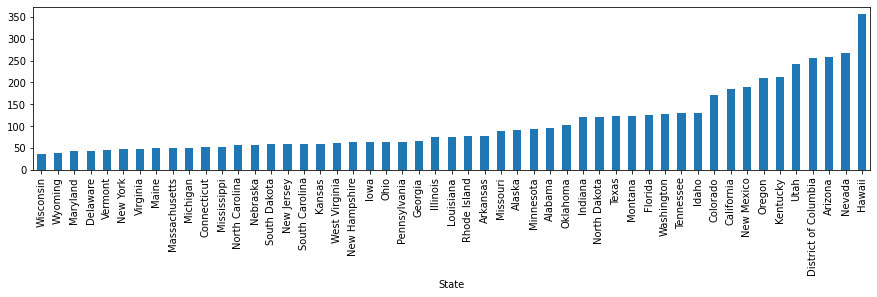

In [272]:
incidents_per_million.sort_values().plot(kind="bar", figsize=(15, 3));

## Time series operations

We will briefly look at some more specific operation for time series data (data with a natural time axis).
Typical operations for time series are resampling or rolling window transformations such as filtering.
Note that Pandas is not a general digital signal processing library - there are other (more capable) tools for this purpose.

First, we set the index to `"timestamp"` to make our dataframe inherently time indexed. This will make doing further time operations easier.

In [169]:
incidents_w_time_index = laser_incidents.set_index("timestamp")
incidents_w_time_index

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
timestamp,,,,,,,,,,
2020-01-01 01:48:00,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,False,Santa Barbara,California
2020-01-01 01:55:00,2020-01-01,155,AMF1829,B190,40000,SSF,Green,False,San Antonio,Texas
2020-01-01 02:14:00,2020-01-01,214,NKS1881,A320,2500,TPA,Green,False,Tampa,Florida
2020-01-01 02:17:00,2020-01-01,217,FDX3873,B763,3000,DFW,Green,False,Fort Worth,Texas
2020-01-01 02:18:00,2020-01-01,218,SWA3635,B739,11000,MOD,Green,False,Modesto,California
...,...,...,...,...,...,...,...,...,...,...
2015-12-31 05:25:00,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,False,Las Vegas,Nevada
2015-12-31 06:23:00,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,False,Lincoln,California
2015-12-31 11:11:00,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,False,Westhampton Beach,New York


First, turn the data into a time series of incidents per hour. This can be done by resampling to 1 hour and using 
`count` (basically on any column or on any column that has any non-NA value) to count the number of incidents.

In [282]:
incidents_hourly = incidents_w_time_index.notna().any(axis="columns").resample("1H").count().rename("incidents per hour")
incidents_hourly

timestamp
2015-01-01 02:00:00    1
2015-01-01 03:00:00    2
2015-01-01 04:00:00    1
2015-01-01 05:00:00    3
2015-01-01 06:00:00    0
                      ..
2020-08-01 06:00:00    0
2020-08-01 07:00:00    1
2020-08-01 08:00:00    1
2020-08-01 09:00:00    0
2020-08-01 10:00:00    3
Name: incidents per hour, Length: 48945, dtype: int64

Looking at those data gives us a bit too detailed information.

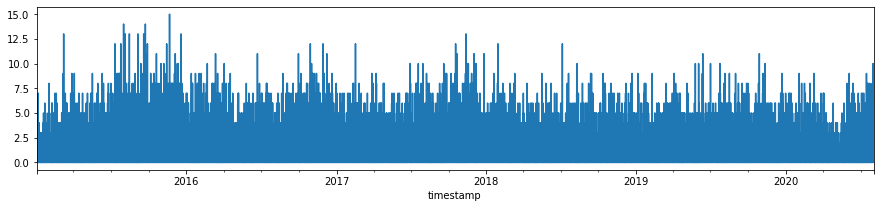

In [285]:
incidents_hourly.sort_index().plot(kind="line", figsize=(15, 3));

A daily mean, the result of resampling to 1 day periods and calculating the mean, is already something more digestible. 
Though still a bit noisy.

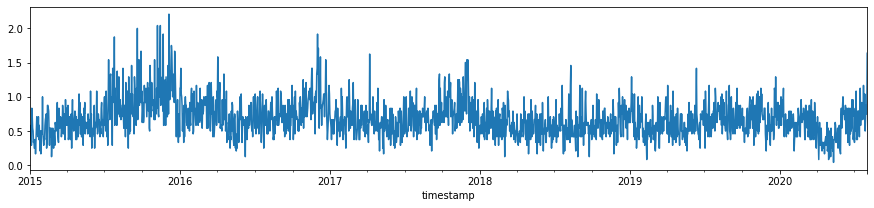

In [286]:
incidents_daily = incidents_hourly.resample("1D").mean()
incidents_daily.plot.line(figsize=(15, 3));

We can look at filtered data by rolling mean with, e.g., 28 days window size.

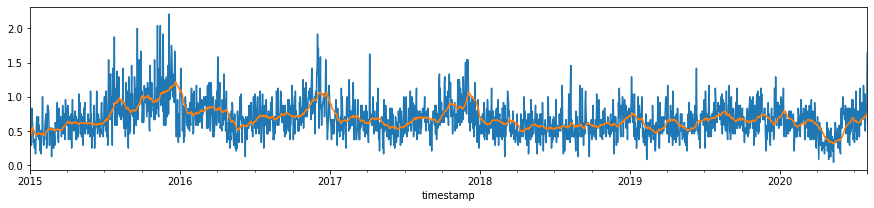

In [181]:
incidents_daily_filtered = incidents_daily.rolling("28D").mean()
incidents_daily.plot.line(figsize=(15, 3));
incidents_daily_filtered.plot.line(figsize=(15, 3));

## Pivoting (Optional)

> pivot (third-person singular simple present pivots, present participle pivoting, simple past and past participle pivoted)
 **To turn on an exact spot.**
 
> A pivot table is a table of statistics that summarizes the data of a more extensive table ...
> Although pivot table is a generic term, Microsoft Corporation trademarked PivotTable in the United States in 1994.

Our pivoting task: Get a table with numbers of titles per year (as row) and type (as column).

One approach is to use `groupby`, `count` aggregation and `unstack`.

In [225]:
grouped_by_year_and_month = laser_incidents_w_population.groupby(
    [
        laser_incidents_w_population["timestamp"].dt.year.astype("Int16"),
        laser_incidents_w_population["timestamp"].dt.month.astype("Int16"),
    ]
)

In [226]:
incidents_by_year_and_month = grouped_by_year_and_month["timestamp"].count().rename_axis(index=["year", "month"]).rename("incidents")
incidents_by_year_and_month

year  month
2015  1        336
      2        336
      3        434
      4        428
      5        444
              ... 
2020  4        250
      5        300
      6        483
      7        535
      8         18
Name: incidents, Length: 68, dtype: int64

In [227]:
pivot_by_year_and_month = incidents_by_year_and_month.unstack().fillna(0)
pivot_by_year_and_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,336.0,336.0,434.0,428.0,444.0,440.0,657.0,600.0,689.0,674.0,749.0,776.0
2016,575.0,517.0,588.0,517.0,408.0,437.0,515.0,515.0,506.0,556.0,690.0,709.0
2017,464.0,460.0,460.0,474.0,395.0,409.0,492.0,498.0,495.0,619.0,652.0,551.0
2018,463.0,397.0,431.0,377.0,414.0,384.0,410.0,418.0,417.0,438.0,404.0,512.0
2019,498.0,316.0,439.0,417.0,392.0,475.0,523.0,552.0,467.0,478.0,502.0,503.0
2020,487.0,426.0,426.0,250.0,300.0,483.0,535.0,18.0,0.0,0.0,0.0,0.0


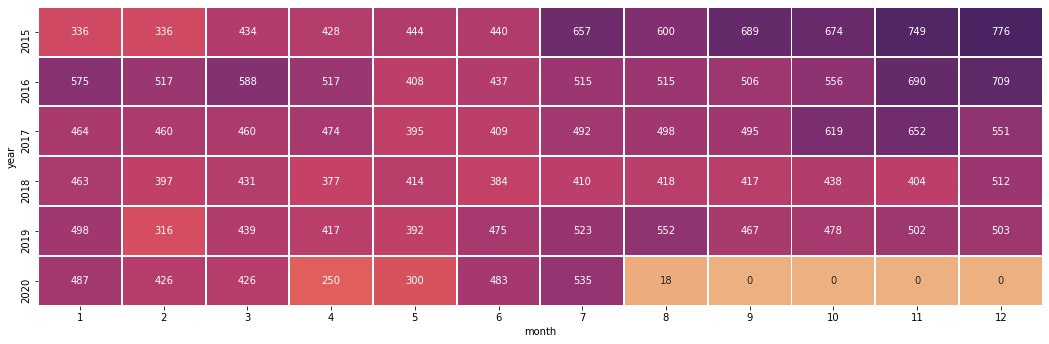

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt


_, ax = plt.subplots(figsize=(18,5.5))   # Vytvoříme dostatečně veliký graf
sns.heatmap(
    pivot_by_year_and_month,
    ax=ax,                  # Kreslíme do připraveného objektu `Axes`
    linewidths=1,           # Oddělíme jednotlivá okénka
    annot=True,             # Chceme zobrazit hodnoty
    fmt=".0f",                # Zobrazíme hodnoty jako celá čísla
    # norm=log_norm,          # Použijeme škálování
    cmap="flare",            # Vybereme si barevnou paletu
    cbar=False,             # Schováme barevný proužek vpravo, nepotřebujeme ho
);

The are also shortcut functions and methods: [DataFrame.pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html), 
[pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
or [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html). 
A nice overview is in the the [Pandas documentation: Reshaping and pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html).

## Final mini-project - creative, unbounded, free-style

Here are some ideas of what you can do with the data.

* TODO